In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


#PCA

In [ ]:
from sklearn.decomposition import PCA

def pca_to_62x62(input_data):

    pca = PCA(n_components=50)
    transformed_data = pca.fit_transform(input_data)
    return transformed_data


#Rescaling


In [ ]:
import numpy as np

def rescale_to_0_255(data):

    # Find the minimum and maximum values in the data
    min_val = data.min()
    max_val = data.max()

    # Perform min-max scaling to rescale the data to [0, 255]
    scaled_data = 255 * (data - min_val) / (max_val - min_val)

    return scaled_data.astype(np.uint8)  # Ensure the data type is uint8 for image representation


In [ ]:
def zscale_row_wise(data):
    scaler = StandardScaler()
    dataz = scaler.fit_transform(data.T).T
    return dataz


In [ ]:
!pip install numpy pandas scipy scikit-learn


# Data transformation for noise reduction and dimensionality reduction along with reshaping

In [ ]:
import os
import numpy as np
from scipy.io import loadmat
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the directory path where the .mat files are located
base_dir = '/content/drive/MyDrive/SEED_IV/SEED_IV/eeg_feature_smooth'

# Set the batch size
batch_size = 96  # Adjust as needed

# Initialize an empty DataFrame
final_df = pd.DataFrame()


# Function to convert a 3D matrix to a 2D matrix
def convert_to_2d(matrix):
    return matrix.reshape((matrix.shape[0],-1))

# Traverse through the directories and load .mat files
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)

    if os.path.isdir(folder_path):
        # Initialize a list to store DataFrames for each batch
        batch_dfs = []

        for file in os.listdir(folder_path):
            if file.endswith('.mat'):
                file_path = os.path.join(folder_path, file)
                data = loadmat(file_path)  # Load .mat file


                # Extract subject number from the file name
                subject_number_str = file.split('_')[0]


                # Try to extract the last two digits; if there's an error, use the last one digit
                try:
                    subject_number = int(subject_number_str[-2:])
                except ValueError:
                    subject_number = int(subject_number_str[-1])

                # Initialize a DataFrame for each batch
                batch_df = pd.DataFrame()

                # Extract and process variables for each subject
                for prefix in ['de_LDS', 'de_movingAve', 'psd_LDS', 'psd_movingAve']:
                    for i in range(1, 25):  # Subject numbers range from 1 to 24
                        var_key = f'{prefix}{i}'
                        if var_key in data:
                            # Get the 3D matrix and convert to 2D
                            matrix_2d = convert_to_2d(data[var_key])
                            column_name = f'{folder}_{subject_number}_{i if i >= 10 else f"0{i}"}'

                            # Create a new column in the DataFrame and assign the variable
                            batch_df[column_name] = [matrix_2d]

                batch_dfs.append(batch_df)

                # Process the batch once it reaches the specified batch size
                if len(batch_dfs) >= batch_size:
                    batch_df = pd.concat(batch_dfs, axis=1)

                    # Apply PCA and rescaling to the batch (if needed)
                    batch_df = batch_df.applymap(zscale_row_wise)
                    batch_df = batch_df.applymap(pca_to_62x62)
                    # batch_df = batch_df.applymap(rescale_to_0_255)

                    # Append the batch to the final DataFrame
                    final_df = pd.concat([final_df, batch_df], axis=1)
                    batch_dfs = []

        # Process any remaining data in the last batch
        if len(batch_dfs) > 0:

            batch_df = pd.concat(batch_dfs, axis=1)

            # Apply PCA and rescaling to the last batch (if needed)
            batch_df = batch_df.applymap(zscale_row_wise)
            batch_df = batch_df.applymap(pca_to_62x62)
            # batch_df = batch_df.applymap(rescale_to_0_255)

            # Append the last batch to the final DataFrame
            final_df = pd.concat([final_df, batch_df], axis=1)

            # Print information after processing the last batch
            print(f"Shape of final_df after processing the last batch: {final_df.shape}")


Shape of final_df after processing the last batch: (1, 360)
Shape of final_df after processing the last batch: (1, 720)
Shape of final_df after processing the last batch: (1, 1080)


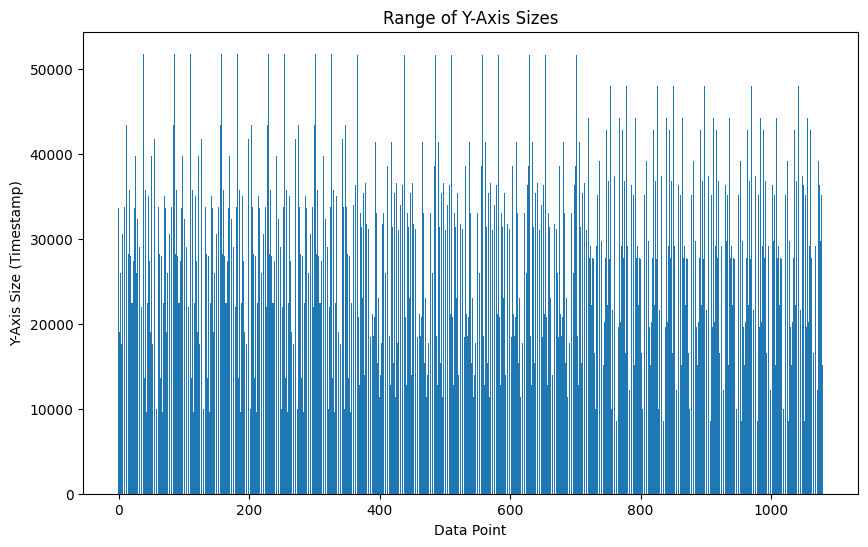

Minimum Y-Axis (Timestamp) Size: 8601
Maximum Y-Axis (Timestamp) Size: 51801


In [ ]:
# import os
# import numpy as np
# from scipy.io import loadmat
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define the directory path where the .mat files are located
# base_dir = '/content/drive/MyDrive/SEED_IV/SEED_IV/eeg_raw_data'

# # Initialize lists to store the shapes of the original data and the corresponding folder
# original_data_shapes = []
# y_axis_sizes = []

# # Traverse through the directories and load .mat files
# for folder in os.listdir(base_dir):
#     folder_path = os.path.join(base_dir, folder)

#     if os.path.isdir(folder_path):
#         for file in os.listdir(folder_path):
#             if file.endswith('.mat'):
#                 file_path = os.path.join(folder_path, file)
#                 data = loadmat(file_path)  # Load .mat file

#                 # Loop through variables in the loaded .mat file
#                 for var_key, var_value in data.items():
#                     # Skip variables that start with double underscores "__"
#                     if var_key.startswith("__"):
#                         continue

#                     # Get the shape of the original data
#                     original_shape = var_value.shape
#                     original_data_shapes.append((folder, var_key, original_shape))
#                     y_axis_sizes.append(original_shape[1])

# # Plot the Y-axis (timestamp) sizes
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(y_axis_sizes)), y_axis_sizes)
# plt.xlabel("Data Point")
# plt.ylabel("Y-Axis Size (Timestamp)")
# plt.title("Range of Y-Axis Sizes")
# plt.show()

# min_y_axis_size = min(y_axis_sizes)
# max_y_axis_size = max(y_axis_sizes)

# print(f"Minimum Y-Axis (Timestamp) Size: {min_y_axis_size}")
# print(f"Maximum Y-Axis (Timestamp) Size: {max_y_axis_size}")


In [ ]:
final_df.head()  # Displays the first 5 rows



,2_12_01,2_12_02,2_12_03,2_12_04,2_12_05,2_12_06,2_12_07,2_12_08,2_12_09,2_12_10,...,1_9_15,1_9_16,1_9_17,1_9_18,1_9_19,1_9_20,1_9_21,1_9_22,1_9_23,1_9_24
0,"[[12.792097580403842, -1.3060728479559482, 1.8...","[[6.822028610551412, 1.321140676757626, 0.0407...","[[-3.713782531082155, 3.521999491155027, 0.884...","[[2.0870157631018893, 4.467475883161304, 1.730...","[[4.396613267401508, 0.008234087182715087, -2....","[[-3.4529246798153683, -0.5813518594812758, 1....","[[0.3487866942498586, 0.8031101543510911, 3.93...","[[-2.381843671451092, 5.732114797081804, -2.31...","[[-3.9687006305546007, -4.218030234887476, -0....","[[5.190164208642543, -0.7302970673168832, -0.7...",...,"[[2.628569286338966, -4.038167903798743, 2.362...","[[0.7749714842715487, 4.000269484026808, -0.06...","[[4.369221125105781, 0.15197206281358408, -1.2...","[[2.734139758838315, -1.2958931836590408, 5.68...","[[-5.46086574919813, -1.1702116321828866, -0.1...","[[-1.2901284495747776, 1.7665126954980446, -0....","[[-4.214099334059905, -1.0086167951239016, -2....","[[-1.6838247767275316, 2.1284364233265367, -2....","[[5.309408701152226, 1.0143431968206535, -1.91...","[[-2.801438209148012, 3.8191277603387217, 1.53..."


In [ ]:
value = final_df.iloc[0, 1077]
print("value:", value)


value: [[-1.68382478e+00  2.12843642e+00 -2.58159484e+00 ... -5.23891820e-05
  -7.92783571e-04  4.02956074e-04]
 [ 2.58748833e+00  3.09273732e+00 -3.43131609e+00 ...  1.10656017e-04
   6.47473871e-04 -3.81685773e-04]
 [ 5.34984454e+00  1.06050732e+00 -2.07991662e+00 ...  2.40174032e-04
  -4.86764961e-04  1.34882437e-04]
 ...
 [-7.79578670e-01  1.31768179e+00  9.03669164e-01 ...  4.26967891e-03
  -3.19893241e-03 -2.35361698e-03]
 [-4.28505215e+00  1.32745464e+00  3.80503007e-01 ... -3.98609060e-03
   1.59890739e-03 -2.49849487e-03]
 [-4.32635844e+00  1.35498556e+00  3.80728124e-01 ...  1.22471652e-03
  -3.28230681e-03  4.42656574e-03]]


In [ ]:
value = final_df.iloc[0, 1077]
print("value:", value.shape)


value: (62, 50)


#Labelling

In [ ]:
#  labels
session1_label = [1, 2, 3, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 3, 2, 2, 3, 3, 0, 3, 0, 3]
session2_label = [2, 1, 3, 0, 0, 2, 0, 2, 3, 3, 2, 3, 2, 0, 1, 1, 2, 1, 0, 3, 0, 1, 3, 1]
session3_label = [1, 2, 2, 1, 3, 3, 3, 1, 1, 2, 1, 0, 2, 3, 3, 0, 2, 3, 0, 0, 2, 0, 1, 0]

#  DataFrame column names
column_names = final_df.columns

# Add a new row for emotion labels
final_df.loc['Emotion_Label'] = [
    session1_label[int(i) - 1] if folder == '1' else
    session2_label[int(i) - 1] if folder == '2' else
    session3_label[int(i) - 1] if folder == '3' else 20
    for folder, _, i in [name.split('_') for name in column_names]
]


In [ ]:
# Convert labels to integers
label_mapping = {'Class 0': 0, 'Class 1': 1, 'Class 2': 2, 'Class 3': 3}
final_df = final_df.replace({'Emotion_Label': label_mapping})

In [ ]:
final_df.head()  # Displays the first 5 rows


,2_12_01,2_12_02,2_12_03,2_12_04,2_12_05,2_12_06,2_12_07,2_12_08,2_12_09,2_12_10,...,1_9_15,1_9_16,1_9_17,1_9_18,1_9_19,1_9_20,1_9_21,1_9_22,1_9_23,1_9_24
0,"[[12.792097580403842, -1.3060728479559482, 1.8...","[[6.822028610551412, 1.321140676757626, 0.0407...","[[-3.713782531082155, 3.521999491155027, 0.884...","[[2.0870157631018893, 4.467475883161304, 1.730...","[[4.396613267401508, 0.008234087182715087, -2....","[[-3.4529246798153683, -0.5813518594812758, 1....","[[0.3487866942498586, 0.8031101543510911, 3.93...","[[-2.381843671451092, 5.732114797081804, -2.31...","[[-3.9687006305546007, -4.218030234887476, -0....","[[5.190164208642543, -0.7302970673168832, -0.7...",...,"[[2.628569286338966, -4.038167903798743, 2.362...","[[0.7749714842715487, 4.000269484026808, -0.06...","[[4.369221125105781, 0.15197206281358408, -1.2...","[[2.734139758838315, -1.2958931836590408, 5.68...","[[-5.46086574919813, -1.1702116321828866, -0.1...","[[-1.2901284495747776, 1.7665126954980446, -0....","[[-4.214099334059905, -1.0086167951239016, -2....","[[-1.6838247767275316, 2.1284364233265367, -2....","[[5.309408701152226, 1.0143431968206535, -1.91...","[[-2.801438209148012, 3.8191277603387217, 1.53..."
Emotion_Label,2,1,3,0,0,2,0,2,3,3,...,2,3,2,2,3,3,0,3,0,3


#Data split

In [ ]:
import numpy as np

# Extract the data and labels
Image_Matrix = final_df.iloc[0, :].to_list()
Label = final_df.iloc[1, :].to_list()

# Define X as the input data (images)
X = np.array(Image_Matrix).reshape(-1, 62, 50, 1)

# Define y as the labels
y = np.array(Label)

# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)



In [ ]:
print("Data types and shapes:")
print("X_train:", type(X_train), X_train.shape if hasattr(X_train, 'shape') else None)
print("X_val:", type(X_val), X_val.shape if hasattr(X_val, 'shape') else None)
print("X_test:", type(X_test), X_test.shape if hasattr(X_test, 'shape') else None)
print("y_train:", type(y_train), y_train.shape if hasattr(y_train, 'shape') else None)
print("y_val:", type(y_val), y_val.shape if hasattr(y_val, 'shape') else None)
print("y_test:", type(y_test), y_test.shape if hasattr(y_test, 'shape') else None)

# Check the data type of the first element in X_train
if len(X_train) > 0:
    print("Data type of the first element in X_train:", type(X_train[0]))
else:
    print("X_train is empty.")

# Check the data type of the first element in y_train
if len(y_train) > 0:
    print("Data type of the first element in y_train:", type(y_train[0]))
else:
    print("y_train is empty.")


Data types and shapes:
X_train: <class 'numpy.ndarray'> (864, 62, 50, 1)
X_val: <class 'numpy.ndarray'> (151, 62, 50, 1)
X_test: <class 'numpy.ndarray'> (65, 62, 50, 1)
y_train: <class 'numpy.ndarray'> (864,)
y_val: <class 'numpy.ndarray'> (151,)
y_test: <class 'numpy.ndarray'> (65,)
Data type of the first element in X_train: <class 'numpy.ndarray'>
Data type of the first element in y_train: <class 'numpy.int64'>


In [ ]:
print(X_train.dtype)

float64


In [ ]:
print(y_train.dtype)

int64


In [ ]:
# X_train = X_train.numpy()
# y_train = y_train.numpy()
# X_val = X_val.numpy()
# y_val = y_val.numpy()
# X_test = X_test.numpy()
# y_test = y_test.numpy()


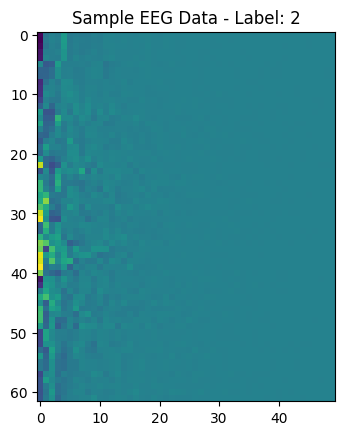

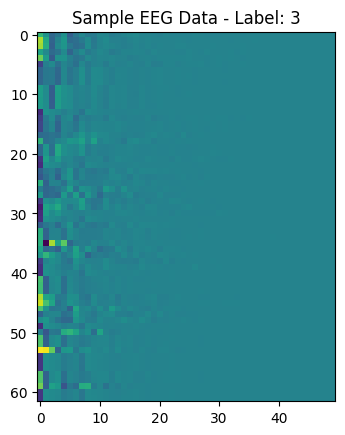

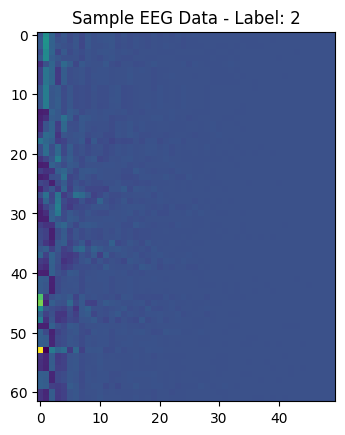

In [ ]:
import matplotlib.pyplot as plt

# Visualize some EEG data samples
sample_indices = [0, 1, 2]
for index in sample_indices:
    sample_image = X_train[index].reshape(62, 50)
    label = y_train[index]

    plt.figure()
    plt.imshow(sample_image, cmap='viridis')
    plt.title(f"Sample EEG Data - Label: {label}")
    plt.show()


# CNN model



Fold 1:
X_train shape: (972, 62, 50, 1), y_train shape: (972,)
X_val shape: (108, 62, 50, 1), y_val shape: (108,)
4/4 [==============================] - 0s 15ms/step - loss: 1.7803 - accuracy: 0.2037

Fold 2:
X_train shape: (972, 62, 50, 1), y_train shape: (972,)
X_val shape: (108, 62, 50, 1), y_val shape: (108,)
4/4 [==============================] - 0s 28ms/step - loss: 1.7314 - accuracy: 0.2222

Fold 3:
X_train shape: (972, 62, 50, 1), y_train shape: (972,)
X_val shape: (108, 62, 50, 1), y_val shape: (108,)
4/4 [==============================] - 0s 15ms/step - loss: 1.5761 - accuracy: 0.3519

Fold 4:
X_train shape: (972, 62, 50, 1), y_train shape: (972,)
X_val shape: (108, 62, 50, 1), y_val shape: (108,)
4/4 [==============================] - 0s 26ms/step - loss: 1.4721 - accuracy: 0.3611

Fold 5:
X_train shape: (972, 62, 50, 1), y_train shape: (972,)
X_val shape: (108, 62, 50, 1), y_val shape: (108,)
4/4 [==============================] - 0s 25ms/step - loss: 1.7933 - accuracy: 0.

3/3 [==============================] - 0s 16ms/step


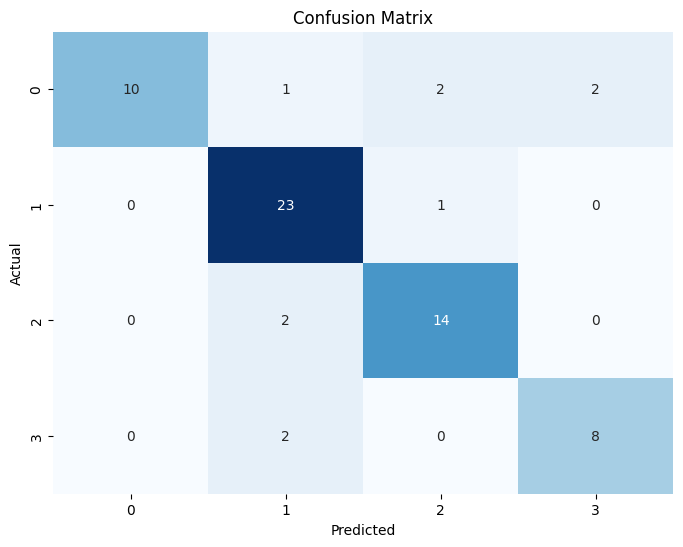

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Feature and label matrices
X = np.array(Image_Matrix).reshape(-1, 62, 50, 1)
y = np.array(Label)

# Set the number of folds
num_folds = 10
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store the results for each fold
all_train_acc = []
all_val_acc = []

# Loop through the folds
for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    print(f"\nFold {fold}:")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

    # Create and compile the model
    model = keras.Sequential([
        keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(62, 50, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(32, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=12, validation_data=(X_val, y_val), verbose=0)

    # Evaluate on training and validation sets
    train_loss, train_acc = model.evaluate(X_train, y_train)
    val_loss, val_acc = model.evaluate(X_val, y_val)

    # Append results to lists
    all_train_acc.append(train_acc)
    all_val_acc.append(val_acc)

# Calculate and print the average accuracy across folds
avg_train_acc = np.mean(all_train_acc)
avg_val_acc = np.mean(all_val_acc)
print(f'\nAverage Training Accuracy: {avg_train_acc}')
print(f'Average Validation Accuracy: {avg_val_acc}')

# Assuming X_test and y_test are your test data
X_test = np.array(X_test).reshape(-1, 62, 50, 1)
y_test = np.array(y_test)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Display the model summary
model.summary()

# Visualize the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Assuming y_train and X_train are available
y_train_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_probs, axis=1)


27/27 [==============================] - 0s 2ms/step


In [ ]:
print("Actual Labels:", y_train[:10])
print("Predicted Labels:", y_train_pred[:10])


Actual Labels: [1 3 2 0 0 0 0 1 0 2]
Predicted Labels: [1 0 2 2 0 2 2 1 2 2]


In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f"Training accuracy: {train_acc}")


27/27 [==============================] - 0s 3ms/step - loss: 62.6087 - accuracy: 0.3206
Training accuracy: 0.32060185074806213


In [ ]:
model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 3844)              0         
                                                                 
 dense_32 (Dense)            (None, 4)                 15380     
                                                                 
Total params: 15380 (60.08 KB)
Trainable params: 15380 (60.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


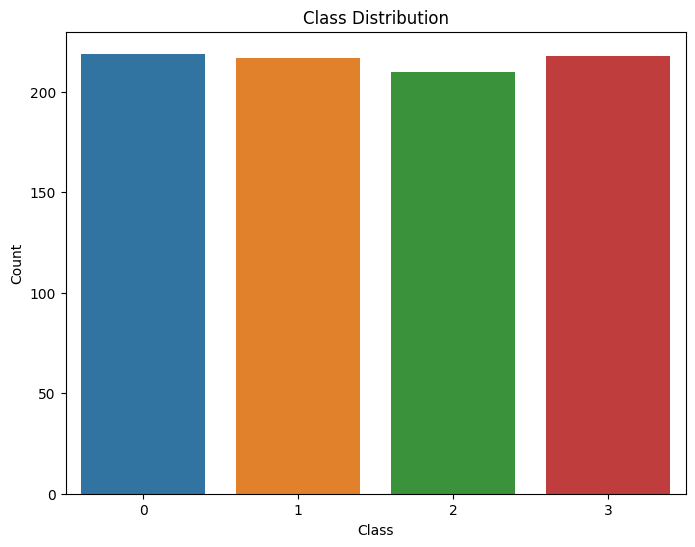

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train contains your class labels
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

